# Mouse trajectories 

I wanted a better way to simulate the animal trajectory. I used sin waves but this is not very realistic.

We could simulate an object running in near straight line until it hits a wall, pick a new direction, and repeat.

The head direction is the heading direction.

### This code is implemented in animal_trajectory.py


In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [125]:
boxSize=80
samplingRate = 50
recordingTimeSec=700
samples=recordingTimeSec*samplingRate
dt = 1/samplingRate
stepSizeRatio = 25/samplingRate # to give it a speed of 25 cm per sec

print("Rec time:{} sec".format(recordingTimeSec))
print("dt:{} sec".format(dt))
print("samples:{}".format(samples))

Rec time:700 sec
dt:0.02 sec
samples:35000


We implement our walk in a few simple functions

In [126]:
def pickRandomAngle():
    # pick a random number between -np.pi to np.pi
    return np.random.uniform(low=-np.pi, high=np.pi, size=1)[0]

def nextStepPosition(current_Xpos,current_Ypos,current_hd,stepSizeRatio):
    x = current_Xpos + np.cos(current_hd)*stepSizeRatio
    y = current_Ypos + np.sin(current_hd)*stepSizeRatio
    return x,y
    
def isInBox(x,y,boxSize=80):
    
    if x > 0 and x < boxSize and y > 0 and y < boxSize:
        return True
    else:
        return False
def addHdNoise(hd,noiseLevel=0.1):
    x = hd + np.random.uniform(low=-0.2, high=0.2, size=1)[0]
    
    # restrict to -np.pi and np.pi, using arctan2
    return np.arctan2(np.sin(x), np.cos(x))
def walk(samples,boxSize,stepSizeRatio=0.5):
    """
    Generate the animal path 
    
    Arguments
    samples: how many data points
    boxSize: size of the square box
    stepSizeRatio: by default the steps are 1 unit, this ratio is used to change this.
    """
    Xpos = np.empty(samples)
    Ypos = np.empty(samples)
    hd = np.empty(samples)
    current_Xpos= boxSize/2
    current_Ypos= boxSize/2
    current_hd = pickRandomAngle()
    
    for i in range(samples):
    
        # add a bit of noise to the head direction
        current_hd = addHdNoise(current_hd)
        # possible new position
        x,y = nextStepPosition(current_Xpos,current_Ypos,current_hd,stepSizeRatio)
        # if out of the box, find a new head direction
        while(not isInBox(x,y)): 
            current_hd = pickRandomAngle()
            x,y = nextStepPosition(current_Xpos,current_Ypos,current_hd,stepSizeRatio)
        # assigned the new position for next iteration
        current_Xpos=x
        current_Ypos=y
        # save the results
        Xpos[i]=current_Xpos
        Ypos[i]=current_Ypos
        hd[i] = current_hd
    
    return Xpos,Ypos,hd

In [127]:
Xpos,Ypos,hd = walk(samples,boxSize,stepSizeRatio)

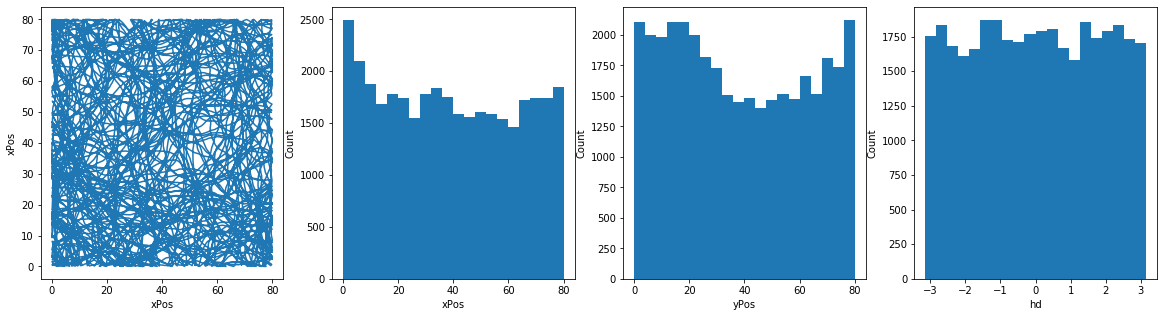

In [128]:
fig,ax =plt.subplots(1,4,figsize=(20,5))
ax[0].plot(Xpos,Ypos)
ax[0].set_xlabel("xPos")
ax[0].set_ylabel("xPos")
ax[1].hist(Xpos,bins=20)
ax[1].set_xlabel("xPos")
ax[1].set_ylabel("Count")
ax[2].hist(Ypos,bins=20)
ax[2].set_xlabel("yPos")
ax[2].set_ylabel("Count")
ax[3].hist(hd,bins=20)
ax[3].set_xlabel("hd")
ax[3].set_ylabel("Count")

plt.show()

Rec time:700 sec
dt:0.02 sec
samples:35000


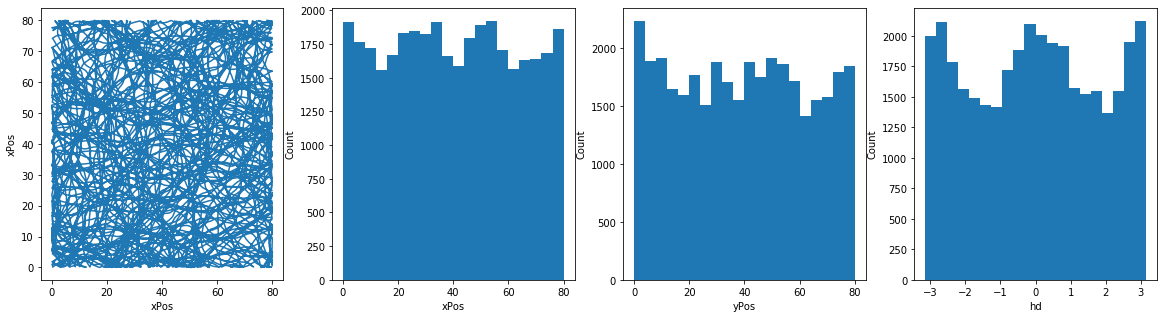

In [2]:
import animal_trajectory

boxSize=80
samplingRate = 50
recordingTimeSec=700
samples=recordingTimeSec*samplingRate
dt = 1/samplingRate
stepSizeRatio = 25/samplingRate # to give it a speed of 25 cm per sec

print("Rec time:{} sec".format(recordingTimeSec))
print("dt:{} sec".format(dt))
print("samples:{}".format(samples))

Xpos,Ypos,hd = animal_trajectory.walk(samples,boxSize,stepSizeRatio)
animal_trajectory.plotPath(Xpos,Ypos,hd)